# CNNÂ§©Ê∞îËØÜÂà´ 

## ËØªÂèñÊï∞ÊçÆÁöÑÊñπÊ≥ï1

### ÂØºÂåÖ  

In [2]:
import torch
from torch.utils.data import TensorDataset,DataLoader 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import numpy as np 
import matplotlib.pyplot as plt 
import shutil 
import os 
import torchvision

### ‚ùó ‰ªéÂàÜÁ±ªÊñá‰ª∂Â§π‰∏≠ÂàõÂª∫datasetÊï∞ÊçÆ 

ImageFolderË¶ÅÊ±Ç`‰∏Ä‰∏™Á±ªÂà´ÊòØ‰∏Ä‰∏™Êñá‰ª∂Â§π`,ÊâÄ‰ª•Êàë‰ª¨ÈúÄË¶ÅÊää‰∏ÄÊï¥ÂùóÂõæÁâáÂÖàÂàíÂàÜÂºÄÊù•

```python 
torchvision.datasets.ImageFolder()
```

#### ÂÖàÊï¥ÁêÜÊï∞ÊçÆÈõÜ

In [ ]:
base_dir = r'./4weather'

In [ ]:
if not os.path.isdir(base_dir):  #Â¶ÇÊûú‰∏çÂ≠òÂú®Â∞±ÂÖàÂàõÂª∫
    os.mkdir(base_dir)
    train_dir = os.path.join(base_dir,'train') #ÂàõÂª∫ËÆ≠ÁªÉÈõÜ 
    test_dir = os.path.join(base_dir,'test') #ÂàõÂª∫ÊµãËØïÈõÜ 
    print(train_dir)
    os.mkdir(train_dir)
    os.mkdir(test_dir)

In [ ]:
ClAsses = ['cloudy','rain','shine','sunrise']
for train_or_test in ['train','test']: 
    for cls in ClAsses: 
        a_path = os.path.join(base_dir,train_or_test)
        b_path = os.path.join(a_path,cls)
        print(b_path)
        os.mkdir(b_path)

        #ÊàñËÄÖÁõ¥Êé•ÂÜô os.mkdir(os.path.join(base_dir,ttrain_or_test,cls))
    

#### Â∞ÜÂõæÁâáÂàÜÁ±ªÂà∞ÂØπÂ∫îÁöÑÊñá‰ª∂Â§π   

In [ ]:
img_dir= r'./dataset2' 

In [ ]:
os.listdir(img_dir) 

In [ ]:
for i,img in enumerate(os.listdir(img_dir)): 
    #ÂØπÂõæÁâáËøõË°åÂàÜÁ±ª 
    for cls in ClAsses:
        if cls in img: #Ê£ÄÊü•ÂΩìÂâçÂõæÁâáÊñá‰ª∂ÂêçÔºàimgÔºâ‰∏≠ÊòØÂê¶ÂåÖÂê´Á±ªÂà´Â≠óÁ¨¶‰∏≤ÔºàclsÔºâ„ÄÇ
            s = os.path.join(img_dir,img) #ÂéüÂßãÂõæÁâáË∑ØÂæÑ
            if i%5==0: #Â¶ÇÊûúÁ¥¢ÂºïÂèØ‰ª•Ë¢´5Êï¥Èô§,ÈÇ£Â∞±ÂàíÂàÜÂà∞ÊµãËØïÈõÜÈáå
                d = os.path.join(base_dir,'test',cls,img) #Â∞ÜÂõæÁâáÊîæÂà∞ÂêÑËá™ÂØπÂ∫îÁöÑÁ±ªÂà´ÂΩì‰∏≠  
                print(d)
            else:
                d = os.path.join(base_dir,
                             'train'
                             ,cls,img) #Â¶ÇÊûú‰∏çÂèØ‰ª•Ë¢´5Êï¥Èô§,ÈÇ£Â∞±ÂàíÂàÜ‰∏∫ËÆ≠ÁªÉÈõÜ
            shutil.copy(s,d)
        
    

#### ÂàÜÂ•Ω‰πãÂêéÊü•Áúã‰∏Ä‰∏ãÊØè‰∏™Êñá‰ª∂ÁöÑÊâÄÂê´ÂõæÁâáÁöÑÊï∞Èáè

In [ ]:
for train_or_test in ['train','test']: 
    for cls in ClAsses: 
        print(train_or_test,cls,len(os.listdir(os.path.join(base_dir,train_or_test,cls))))

### ËØªÂèñ,È¢ÑÂ§ÑÁêÜÂπ∂ÂàõÂª∫Dataset 

In [4]:
from torchvision import transforms

In [5]:
transform=transforms.Compose(
    [
        transforms.Resize((96,96)), #ËΩ¨Êç¢ÂõæÁâáÂ∞∫ÂØ∏  
        transforms.ToTensor(), ## Â∞ÜPILÂõæÂÉèÊàñnumpyÊï∞ÁªÑËΩ¨Êç¢‰∏∫PyTorchÂº†ÈáèÔºåÂπ∂Â∞ÜÂÉèÁ¥†ÂÄºÂΩí‰∏ÄÂåñÂà∞[0,1]
        transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]) #ÊääÊï∞ÊçÆËåÉÂõ¥‰ªé [0,1] Êò†Â∞ÑÂà∞ [-1,1]„ÄÇ# ÂØπÊØè‰∏™ÈÄöÈÅìËøõË°åÊ†áÂáÜÂåñÂ§ÑÁêÜÔºå‰ΩøÊï∞ÊçÆÂàÜÂ∏ÉËåÉÂõ¥Âèò‰∏∫ [-1,1]ÔºåÊúâÂä©‰∫éÊ®°ÂûãËÆ≠ÁªÉ
    ]
    
)

In [6]:
Train_DS = torchvision.datasets.ImageFolder(
    '4weather/train', 
    transform=transform
)

In [7]:
Tst_DS = torchvision.datasets.ImageFolder(
    '4weather/test', 
    transform=transform
)

In [8]:
Train_DS.classes

['cloudy', 'rain', 'shine', 'sunrise']

In [9]:
Tst_DS.classes

['cloudy', 'rain', 'shine', 'sunrise']

In [10]:
Train_DS.class_to_idx,len(Train_DS)

({'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}, 900)

In [11]:
Tst_DS.class_to_idx,len(Tst_DS)

({'cloudy': 0, 'rain': 1, 'shine': 2, 'sunrise': 3}, 225)

### ÂàõÂª∫DataLoader 

In [12]:
Train_DL = DataLoader(Train_DS,batch_size=32,shuffle=True)
Tst_DL = DataLoader(Tst_DS,batch_size=64,shuffle=False)

#### ÊãøÂá∫‰∏Ä‰∏™ÊâπÊ¨°ÁöÑÊï∞ÊçÆÊü•Áúã

In [11]:
imgs,labels = next(iter(Train_DL))

In [12]:
imgs.shape #ÊâπÈáèÂ§ßÂ∞è32,3‰∏™ÈÄöÈÅì(rgb),È´ò96px,ÂÆΩ96px

torch.Size([32, 3, 96, 96])

In [13]:
imgs[0].shape

torch.Size([3, 96, 96])

In [14]:
im = imgs[0].permute(1,2,0) #ËÆ©[3,96,96] (c,h,w)Ôºà0Ôºå1Ôºå2Ôºâ ËΩ¨ÂèòÊàê[96,96,3](h,w,c)Ôºà1Ôºå2Ôºå0Ôºâ Êñπ‰æøÊàë‰ª¨‰ΩøÁî®matplotlibÁªòÂõæ
im.shape

torch.Size([96, 96, 3])

#### ÁªòÂà∂

Áî±‰∫éÂàöÊâçÁöÑtransformÂ∞ÜÂÖ∂normalizeÂà∞‰∫Ü-1-1‰πãÈó¥,ÊâÄ‰ª•Êàë‰ª¨ÈúÄË¶ÅÂ∞ÜÂÖ∂ËøòÂéü‰∏∫0-1‰πãÈó¥,‰πüÂ∞±ÊòØËÆ©ËΩ¨Êç¢ÂêéÁöÑÊï∞ÊçÆ+1ÂÜç/2

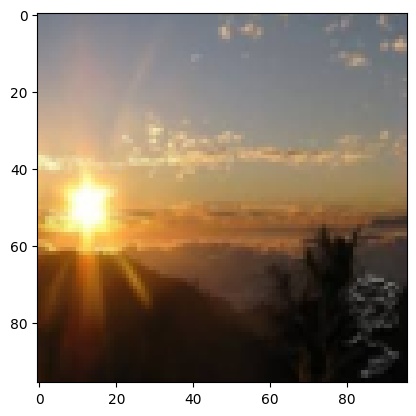

In [15]:
im = im.numpy()
im = (im+1)/2
plt.imshow(im) #ËΩ¨Êç¢ÊàênpÁ±ªÂûãÂπ∂ÁªòÂõæ

In [16]:
labels[0]

tensor(3)

ÂèØ‰ª•ÁúãÂà∞ÂØπÂ∫î‰∏ä‰∫Üclass_to_idx‰∏≠ÁöÑsunrise

#### ËÆ©Á±ªÂà´Êï∞ÂÄºËΩ¨Êç¢‰∏∫Á±ªÂà´

In [13]:
Train_DS.class_to_idx.items()

dict_items([('cloudy', 0), ('rain', 1), ('shine', 2), ('sunrise', 3)])

Â∞ÜÁ±ªÂà´ÂØπÂ∫îÂÖ≥Á≥ªÁöÑdict_itemsËøô‰∏™ÂàóË°®‰∏≠ÁöÑÂÖÉÁªÑËΩ¨Êç¢‰∏∫Â≠óÂÖ∏

In [14]:
id_to_class = dict((v,k) for k,v in Train_DS.class_to_idx.items())

In [15]:
id_to_class

{0: 'cloudy', 1: 'rain', 2: 'shine', 3: 'sunrise'}

#### ÁÆÄÂçïÊü•Áúã

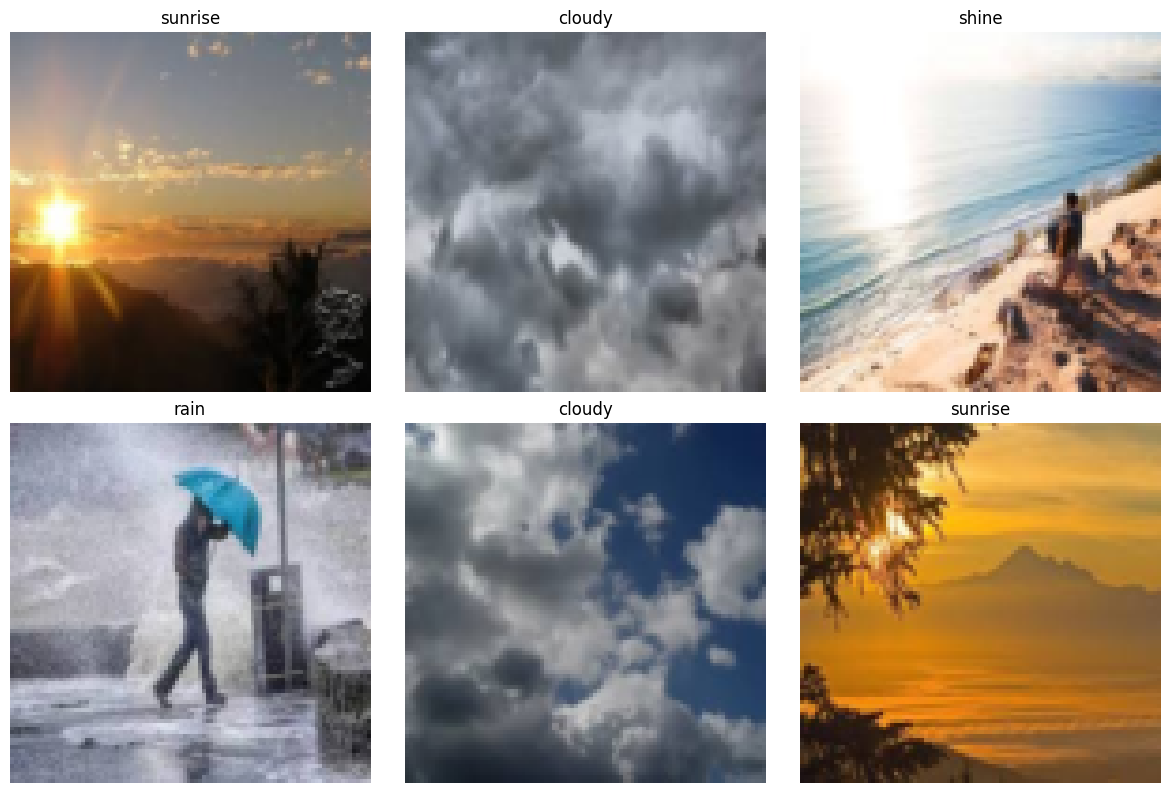

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# ÈÅçÂéÜÂâç6‰∏™Ê†∑Êú¨
for i in range(6):
    img = imgs[i]  # Ëé∑ÂèñÁ¨¨iÂº†ÂõæÂÉè (3, 96, 96)
    label = labels[i].item()  # ËΩ¨Êç¢‰∏∫PythonÊ†áÈáè
    
    # Â∞ÜÂõæÂÉè‰ªé [C, H, W] ËΩ¨‰∏∫ [H, W, C] Âπ∂ËøòÂéüÂà∞ [0,1] ËåÉÂõ¥
    img = (img.permute(1, 2, 0).numpy() + 1) / 2  # NormalizeÂèçÂΩí‰∏ÄÂåñÂà∞[0,1]
    
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(id_to_class[label])  # ÂÅáËÆæ‰Ω†Êúâ‰∏Ä‰∏™ id_to_class Â≠óÂÖ∏
    plt.axis('off')  # ÂÖ≥Èó≠ÂùêÊ†áËΩ¥

plt.tight_layout()
plt.show()

### ÂàõÂª∫Ê®°Âûã 

In [16]:
 class Net(nn.Module): 
    def __init__(self):
         super().__init__()  
         #ÂàùÂßãÂåñÂç∑ÁßØÂ±Ç  
         self.conv1 = nn.Conv2d(in_channels=3,out_channels=16,kernel_size=3) #‰ΩøÁî®6‰∏™Âç∑ÁßØÊ†∏ÔºåÂç∑ÁßØÊ†∏Â§ßÂ∞è‰∏∫5*5
         #ËÆæÁΩÆÁ¨¨‰∫å‰∏™Âç∑ÁßØÂ±Ç
         self.conv2 = nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3)  #Á¨¨‰∏Ä‰∏™Âç∑ÁßØÂ±ÇÊòØ6‰∏™ËæìÂá∫channels,ÊâÄ‰ª•Á¨¨‰∫å‰∏™Âç∑ÁßØÂ±ÇÁöÑËæìÂÖ•channelÂ§ßÂ∞èÊòØÁ¨¨‰∏Ä‰∏™Âç∑ÁßØÂ±ÇÁöÑËæìÂÖ•Â§ßÂ∞è
         #ËÆæÁΩÆÁ¨¨‰∏â‰∏™Âç∑ÁßØÂ±Ç 
         self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3)
         #ËÆæÁΩÆÊ±†ÂåñÂ±Ç
         self.pool = nn.MaxPool2d(kernel_size=(2,2))  #ËÆæÁΩÆÊ±†ÂåñÊ†∏‰∏∫2*2 ,‰πüÂ∞±ÊòØÂõõ‰∏™Ê†ºÂ≠êÈáåÈÄâÂá∫‰∏Ä‰∏™,ÂéüÊù•ÁöÑÊòØ28*28ÁöÑ,ÁÑ∂Âêé‰ºöÂèòÊàê14*14ÁöÑ
         
         #ËÆæÁΩÆÂÖ®ËøûÊé•Â±Ç
         
         self.fc1 = nn.Linear(20*20*64,1024) #Â±ïÂπ≥,Ëá™Â∑±ÁÆóÁöÑ
         self.fc2 = nn.Linear(1024,256) 
         self.fc3 = nn.Linear(256,4) #4Á±ªÂ§©Ê∞î
    def forward(self, x):
        # Á¨¨‰∏ÄÂ±ÇÂç∑ÁßØ + ÊøÄÊ¥ª + Ê±†Âåñ
        x = self.pool(F.relu(self.conv1(x))) 
        
        # Á¨¨‰∫åÂ±ÇÂç∑ÁßØ + ÊøÄÊ¥ª + Ê±†Âåñ
        x = self.pool(F.relu(self.conv2(x))) 
        #Á¨¨‰∏âÂ±ÇÂç∑ÁßØ+ÊøÄÊ¥ª
        x = F.relu(self.conv3(x)) 
          
        # Â±ïÂπ≥‰∏∫‰∏ÄÁª¥ÂêëÈáè
        #x = x.view(-1, 20*20*64)  
        x = torch.flatten(x,1)

        # ÂÖ®ËøûÊé•Â±Ç
        x = F.relu(self.fc1(x))     
        x = F.relu(self.fc2(x))     
        x = self.fc3(x)      

        return x

In [22]:
model = Net() 

In [23]:
model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=25600, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=4, bias=True)
)

### ÂºÄËÆ≠

#### ÂàõÂª∫ËÆ≠ÁªÉÊñπÊ≥ï

In [17]:
def fit_gpu(Train_DL,TST_DL,Model_m,epoch_,optim,loss_fn): 
    correct = 0
    total = 0
    running_loss = 0
    tstcorrect = 0
    tsttotal = 0
    tstrunning_loss = 0
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    Model_m.to(device)
  
    Model_m.train()  # ËÆæÁΩÆ‰∏∫ËÆ≠ÁªÉÊ®°Âºè,Ê≠§Êó∂dropoutÂ±Ç‰ºöÂèëÊå•‰ΩúÁî®
    for x, y in Train_DL:
        x = x.to(device)
        y = y.to(device)
        
        y_pred = Model_m(x)
        loss = loss_fn(y_pred, y)
        
        optim.zero_grad()
        loss.backward()
        optim.step()

        # ÊØè‰∏™epochÁªìÊùüÂêéËØÑ‰º∞Ê®°Âûã
        # ÊâÄÊúâ batch ÈÉΩËÆ≠ÁªÉÂÆåÂêéÔºåÂÜçËÆ°ÁÆóÊï¥‰∏™ epoch ÁöÑÂáÜÁ°ÆÁéáÂíåÊçüÂ§±
        with torch.no_grad():
            y_pred = torch.argmax(y_pred,dim=1)  #Ê≤øÁùÄÁ±ªÂà´Áª¥Â∫¶ÊâæÂà∞ÊúÄÂ§ßÂÄºÁöÑÁ¥¢Âºï‰ΩçÁΩÆ
            correct += (y_pred == y).sum().item() #È¢ÑÊµãÊ≠£Á°ÆÁöÑ‰∏™Êï∞
            # Âõ†‰∏∫(y_pred == y).sum()ÊòØ‰∏Ä‰∏™Âº†Èáè,ÊâÄ‰ª•‰∏∫‰∫ÜÁ≠âÂºèÂèØ‰ª•Êï∞ÂÄºÊìç‰Ωú,Êàë‰ª¨Áî®.item()ÂèñÂÄº
            total += y.size(0) #Ê†∑Êú¨ÁöÑ‰∏™Êï∞,‰πüÂ∞±ÊòØsizeËøîÂõûÂÄºÁöÑÁ¨¨‰∏Ä‰∏™ËøîÂõûÂÄº,Âç≥Ë°åÊï∞
            running_loss += loss.item()

        
    epoch_acc = correct/total
    epoch_loss = running_loss/len(Train_DL.dataset)

    #ÊµãËØïÈò∂ÊÆµ 
    Model_m.eval() #ËΩ¨‰∏∫eval()Ê®°Âºè,Ê≠§Êó∂dropoutÂ±Ç‰∏ç‰ºöËµ∑‰ΩúÁî®
    with torch.no_grad(): #ÊµãËØï‰∏çÈúÄË¶ÅÂèçÂêë‰º†Êí≠,ËÄåÊòØÁî®ËÆ≠ÁªÉÂ•ΩÁöÑÊ®°ÂûãÊù•ÊµãËØïÊµãËØïÈõÜÁöÑÊï∞ÊçÆ
         for x, y in TST_DL:
             x, y = x.to(device), y.to(device)
             y_pred =Model_m(x)
             loss = loss_fn(y_pred, y)
             
             y_pred = torch.argmax(y_pred,dim=1)   #Ëé∑ÂèñÁúüÊ≠£ÁöÑÈ¢ÑÊµãÁªìÊûú,‰∏çÊáÇÂ∞±ÂæÄ‰∏äÂ∑¥Êãâargmax
             tstcorrect += (y_pred == y).sum().item() #È¢ÑÊµãÊ≠£Á°ÆÁöÑ‰∏™Êï∞
             tsttotal += y.size(0) #Ê†∑Êú¨ÁöÑ‰∏™Êï∞
             tstrunning_loss += loss.item()
             
    tstepoch_acc = tstcorrect/tsttotal
    tstepoch_loss = tstrunning_loss/len(TST_DL.dataset)

    print(
        f'epoch:{epoch} | loss:{epoch_loss:.3f} | acc:{epoch_acc:.3f} | tstloss:{tstepoch_loss:.3f} | tstacc:{tstepoch_acc:.3f}'
    )

    return epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc


#### ÂàõÂª∫ÊçüÂ§±ÂáΩÊï∞Á≠â

In [25]:
lr = 0.001 
loss_fn = nn.CrossEntropyLoss() 
optim = torch.optim.Adam(model.parameters(),lr=lr)

train_loss_gpu=[] 
train_acc_gpu =[]  
tst_loss_gpu = [] 
tst_acc_gpu=[] 
epochs = 20
for epoch in range(epochs): 
    epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc = fit_gpu(Train_DL=Train_DL,TST_DL=Tst_DL,Model_m=model,epoch_=epoch,optim=optim,loss_fn=loss_fn)
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)

epoch:0 | loss:0.025 | acc:0.620 | tstloss:0.009 | tstacc:0.822
epoch:1 | loss:0.016 | acc:0.787 | tstloss:0.008 | tstacc:0.844
epoch:2 | loss:0.013 | acc:0.831 | tstloss:0.009 | tstacc:0.836
epoch:3 | loss:0.011 | acc:0.857 | tstloss:0.008 | tstacc:0.907
epoch:4 | loss:0.009 | acc:0.896 | tstloss:0.008 | tstacc:0.898
epoch:5 | loss:0.009 | acc:0.890 | tstloss:0.008 | tstacc:0.884
epoch:6 | loss:0.006 | acc:0.912 | tstloss:0.010 | tstacc:0.893
epoch:7 | loss:0.005 | acc:0.941 | tstloss:0.011 | tstacc:0.893
epoch:8 | loss:0.004 | acc:0.949 | tstloss:0.013 | tstacc:0.902
epoch:9 | loss:0.003 | acc:0.966 | tstloss:0.012 | tstacc:0.889
epoch:10 | loss:0.002 | acc:0.983 | tstloss:0.017 | tstacc:0.884
epoch:11 | loss:0.005 | acc:0.951 | tstloss:0.011 | tstacc:0.907
epoch:12 | loss:0.005 | acc:0.959 | tstloss:0.019 | tstacc:0.813
epoch:13 | loss:0.009 | acc:0.910 | tstloss:0.014 | tstacc:0.889
epoch:14 | loss:0.002 | acc:0.986 | tstloss:0.025 | tstacc:0.902
epoch:15 | loss:0.002 | acc:0.986 |

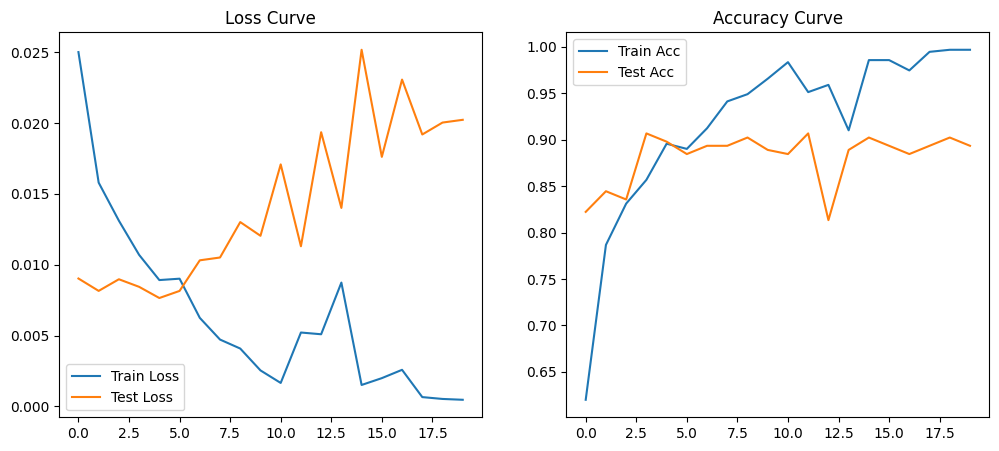

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_gpu, label='Train Loss')
plt.plot(tst_loss_gpu, label='Test Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_acc_gpu, label='Train Acc')
plt.plot(tst_acc_gpu, label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

ÂèØ‰ª•ÁúãÂà∞Â∑≤Áªè‰∫ßÁîüËøáÊãüÂêàÁé∞Ë±°‰∫Ü

### Ëß£ÂÜ≥ËøáÊãüÂêà

#### dropout ÁÆÄ‰ªã   

Dropout ÊòØ‰∏ÄÁßçÂú®ËÆ≠ÁªÉÁ•ûÁªèÁΩëÁªúÊó∂Áî®‰∫éÊäëÂà∂ËøáÊãüÂêàÁöÑÊúâÊïàÊäÄÊúØ„ÄÇÂÆÉÁî± Geoffrey Hinton Á≠â‰∫∫Âú® 2012 Âπ¥ÊèêÂá∫ÔºåÂπ∂Ë¢´ÂπøÊ≥õÂ∫îÁî®‰∫éÂêÑÁßçÊ∑±Â∫¶Â≠¶‰π†Ê®°Âûã‰∏≠ÔºåÁâπÂà´ÊòØÈÇ£‰∫õÂÖ∑ÊúâÂ§ßÈáèÂèÇÊï∞ÁöÑÊ∑±Â±ÇÁΩëÁªú„ÄÇ

#### Dropout ÊäëÂà∂ËøáÊãüÂêàÁöÑÂéüÁêÜ

##### 1. **ÈöèÊú∫Â§±Ê¥ªÁ•ûÁªèÂÖÉ**

- Âú®ÊØèÊ¨°ËÆ≠ÁªÉËø≠‰ª£‰∏≠ÔºåDropout ‰ºö‰ª•‰∏ÄÂÆöÁöÑÊ¶ÇÁéáÔºàÈÄöÂ∏∏ÊòØ 0.5ÔºâÈöèÊú∫‚Äú‰∏¢ÂºÉ‚ÄùÁΩëÁªú‰∏≠ÁöÑÊüê‰∫õÁ•ûÁªèÂÖÉÔºàÂç≥Â∞ÜÂÆÉ‰ª¨ÁöÑËæìÂá∫ËÆæÁΩÆ‰∏∫Èõ∂ÔºâÔºåËøôÊÑèÂë≥ÁùÄËøô‰∫õÁ•ûÁªèÂÖÉ‰∏ç‰ºöÂèÇ‰∏éÂâçÂêë‰º†Êí≠ÂíåÂèçÂêë‰º†Êí≠„ÄÇ
- ËøôÁßçÂÅöÊ≥ïÁõ∏ÂΩì‰∫éÂàõÂª∫‰∫Ü‰∏Ä‰∏™‚ÄúÂº±ÂåñÁâà‚ÄùÁöÑÁΩëÁªúÔºåÂõ†‰∏∫ÈÉ®ÂàÜÁ•ûÁªèÂÖÉË¢´ÊöÇÊó∂ÁßªÈô§ÔºåÂáèÂ∞ë‰∫ÜÁΩëÁªúÂ§çÊùÇÂ∫¶„ÄÇ
  
##### 2. **Èò≤Ê≠¢ÁâπÂæÅÂÖ±ÈÄÇÂ∫î**

- Dropout Èò≤Ê≠¢‰∫ÜÁ•ûÁªèÂÖÉ‰πãÈó¥ÁöÑÁâπÂæÅÂÖ±ÈÄÇÂ∫îÔºàco-adaptationÔºâÔºåÂç≥`ÈÅøÂÖç‰∫ÜÊüê‰∫õÁ•ûÁªèÂÖÉËøáÂ∫¶‰æùËµñÂÖ∂‰ªñÁâπÂÆöÁ•ûÁªèÂÖÉÁöÑËæìÂá∫`„ÄÇÈÄöËøáÂº∫Âà∂ÁΩëÁªúÂú®‰∏çÂêåÁöÑËÆ≠ÁªÉËø≠‰ª£‰∏≠Â≠¶‰π†Êõ¥È≤ÅÊ£íÁöÑÁâπÂæÅË°®Á§∫ÔºåÂèØ‰ª•ÊèêÈ´òÊ®°ÂûãÁöÑÊ≥õÂåñËÉΩÂäõ„ÄÇ
  
##### 3. **ÈõÜÊàêÊïàÂ∫î**

- Âú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÔºåÁî±‰∫éÊØèÊ¨°Ëø≠‰ª£ÈÉΩ‰ºöÁîüÊàê‰∏Ä‰∏™‰∏çÂêåÁöÑ‚ÄúÂº±ÂåñÁâà‚ÄùÁΩëÁªúÁªìÊûÑÔºå‰ªéÊüêÁßçÊÑè‰πâ‰∏äÊù•ËØ¥ÔºåËøôÁ±ª‰ºº‰∫éËÆ≠ÁªÉ‰∫ÜËÆ∏Â§ö‰∏çÂêåÊû∂ÊûÑÁöÑÂ≠êÁΩëÁªú„ÄÇ
- ÂΩìËøõË°åÈ¢ÑÊµãÊó∂ÔºàÊµãËØïÈò∂ÊÆµÔºâÔºåÊâÄÊúâÁöÑÁ•ûÁªèÂÖÉÈÉΩË¢´ÊøÄÊ¥ªÔºà‰ΩÜÈÄöÂ∏∏‰ºö‰πò‰ª• dropout Ê¶ÇÁéá pÔºå‰æãÂ¶Ç 0.5ÔºåÊù•Âπ≥Ë°°ËÆ≠ÁªÉÂíåÊµãËØïÊó∂ÁöÑËæìÂá∫Â∞∫Â∫¶ÔºâÔºåËøôÁßçÂÅöÊ≥ïÂèØ‰ª•Áúã‰ΩúÊòØÊâÄÊúâËøô‰∫õÂ≠êÁΩëÁªúÁöÑÂä†ÊùÉÂπ≥ÂùáÔºå‰ªéËÄåËé∑ÂæóÁ±ª‰ººÈõÜÊàêÂ≠¶‰π†ÁöÑÊïàÊûúÔºåËøõ‰∏ÄÊ≠•ÊèêÂçáÊ®°ÂûãÊÄßËÉΩ„ÄÇ

##### 4. **ÂáèÂ∞ëÊ®°ÂûãÂ§çÊùÇÂ∫¶**

- Dropout ÂèØ‰ª•Ë¢´ËßÜ‰∏∫‰∏ÄÁßçÊ≠£ÂàôÂåñÊñπÊ≥ïÔºåÂÆÉÈÄöËøáÂáèÂ∞ëÊ®°ÂûãÁöÑÊúâÊïàÂÆπÈáèÊù•Èò≤Ê≠¢ËøáÊãüÂêà„ÄÇËôΩÁÑ∂ÁêÜËÆ∫‰∏äÂÆåÊï¥ÁöÑÁΩëÁªúÂèØËÉΩËøá‰∫éÂ§çÊùÇ‰ª•Ëá≥‰∫éÂÆπÊòìËøáÊãüÂêàÔºå‰ΩÜÈÄöËøáÂú®ËÆ≠ÁªÉÊúüÈó¥ÈöèÊú∫‰∏¢ÂºÉ‰∏Ä‰∫õÂçïÂÖÉÔºåÂÆûÈôÖ‰∏äÈôç‰Ωé‰∫ÜÊ®°ÂûãÁöÑÂ§çÊùÇÊÄßÔºå‰ΩøÂæóÊ®°ÂûãÊõ¥Âä†ÂÄæÂêë‰∫éÂ≠¶‰π†‰∏ÄËà¨ÂåñÁöÑÁâπÂæÅËÄåÈùûÁâπÂÆö‰∫éËÆ≠ÁªÉÊï∞ÊçÆÈõÜÁöÑÁªÜËäÇ„ÄÇ

#### ÂÆûÁé∞ÊñπÂºè

Âú® PyTorch ‰∏≠Ôºå‰Ω†ÂèØ‰ª•ÂæàÂÆπÊòìÂú∞Â∞Ü Dropout Â∫îÁî®Âà∞‰Ω†ÁöÑÁΩëÁªú‰∏≠Ôºö

```python
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        
        # Ê∑ªÂä† Dropout Â±Ç
        self.dropout = nn.Dropout(p=0.5)  # ËÆæÁΩÆ‰∏¢ÂºÉÊ¶ÇÁéá
        
        self.fc1 = nn.Linear(64 * 20 * 20, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # ‰ΩøÁî® Dropout
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
```

#### ÊÄªÁªì

Dropout ÈÄöËøáÂú®ËÆ≠ÁªÉËøáÁ®ã‰∏≠ÈöèÊú∫‰∏¢ÂºÉÁ•ûÁªèÂÖÉÊù•ÁÆÄÂåñÊ®°ÂûãÔºåÈò≤Ê≠¢ËøáÊãüÂêàÂπ∂ÊèêÈ´òÊ®°ÂûãÁöÑÊ≥õÂåñËÉΩÂäõ„ÄÇÂÆÉ‰∏ç‰ªÖËÉΩÂ§üÈôç‰ΩéÂçï‰∏™Ê®°ÂûãÁöÑËøáÊãüÂêàÈ£éÈô©ÔºåËøòËÉΩÂ§üÊ®°ÊãüÂá∫Â§ö‰∏™‰∏çÂêåÁªìÊûÑÁöÑÊ®°ÂûãÊïàÊûúÔºå‰ªéËÄåÂ¢ûÂº∫ÊúÄÁªàÊ®°ÂûãÁöÑË°®Áé∞„ÄÇÁÑ∂ËÄåÔºåÂú®ÊµãËØïÊàñÊé®ÁêÜÈò∂ÊÆµÔºåÊâÄÊúâÁöÑÁ•ûÁªèÂÖÉÈÉΩÈúÄË¶ÅË¢´‰ΩøÁî®Ôºå‰∏∫‰∫ÜË°•ÂÅøËÆ≠ÁªÉÊó∂ÁöÑ‰∏¢Â§±ÊØî‰æãÔºåÈÄöÂ∏∏‰ºöÂØπÊøÄÊ¥ªÂÄºËøõË°åÁõ∏Â∫îÁöÑÁº©ÊîæÂ§ÑÁêÜ„ÄÇ

#### ÂÆö‰πâÂ∏¶ÊúâDropoutÁöÑÊ®°Âûã

In [30]:
import torch.nn as nn

class Net_with_dropout(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        
        # Ê∑ªÂä† Dropout Â±Ç
        self.dropout = nn.Dropout(p=0.5)  # ËÆæÁΩÆ‰∏¢ÂºÉÊ¶ÇÁéá

        # ÂΩìÁÑ∂,‰πüÂèØ‰ª•Âú®Âç∑ÁßØÂ±ÇÊ∑ªÂä†dropout  
        self.dropout2d = nn.Dropout2d(p=0.5)
        
        self.fc1 = nn.Linear(64 * 20 * 20, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.Dropout2d(x)
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)  # ‰ΩøÁî® Dropout
        x = F.relu(self.fc2(x))
        x = self.dropout(x) #‰ΩøÁî®dropout
        x = self.fc3(x)
        
        return x

#### ÂºÄËÆ≠  

In [28]:
model = Net_with_dropout()  #ÂÆû‰æãÂåñÊ®°ÂûãÂØπË±°  
lr = 0.001
loss_fn = nn.CrossEntropyLoss() 
optim = torch.optim.Adam(model.parameters(),lr=lr)

train_loss_gpu=[] 
train_acc_gpu =[]  
tst_loss_gpu = [] 
tst_acc_gpu=[] 
epochs = 20
for epoch in range(epochs): 
    epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc = fit_gpu(Train_DL=Train_DL,TST_DL=Tst_DL,Model_m=model,epoch_=epoch,optim=optim,loss_fn=loss_fn)
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)

epoch:0 | loss:0.031 | acc:0.582 | tstloss:0.011 | tstacc:0.707
epoch:1 | loss:0.019 | acc:0.747 | tstloss:0.011 | tstacc:0.756
epoch:2 | loss:0.015 | acc:0.804 | tstloss:0.009 | tstacc:0.836
epoch:3 | loss:0.013 | acc:0.857 | tstloss:0.008 | tstacc:0.840
epoch:4 | loss:0.011 | acc:0.881 | tstloss:0.008 | tstacc:0.876
epoch:5 | loss:0.010 | acc:0.886 | tstloss:0.008 | tstacc:0.889
epoch:6 | loss:0.012 | acc:0.901 | tstloss:0.007 | tstacc:0.898
epoch:7 | loss:0.011 | acc:0.879 | tstloss:0.009 | tstacc:0.884
epoch:8 | loss:0.008 | acc:0.901 | tstloss:0.009 | tstacc:0.911
epoch:9 | loss:0.007 | acc:0.933 | tstloss:0.008 | tstacc:0.902
epoch:10 | loss:0.006 | acc:0.934 | tstloss:0.009 | tstacc:0.916
epoch:11 | loss:0.006 | acc:0.946 | tstloss:0.009 | tstacc:0.889
epoch:12 | loss:0.006 | acc:0.919 | tstloss:0.012 | tstacc:0.876
epoch:13 | loss:0.006 | acc:0.937 | tstloss:0.008 | tstacc:0.902
epoch:14 | loss:0.003 | acc:0.960 | tstloss:0.010 | tstacc:0.889
epoch:15 | loss:0.003 | acc:0.971 |

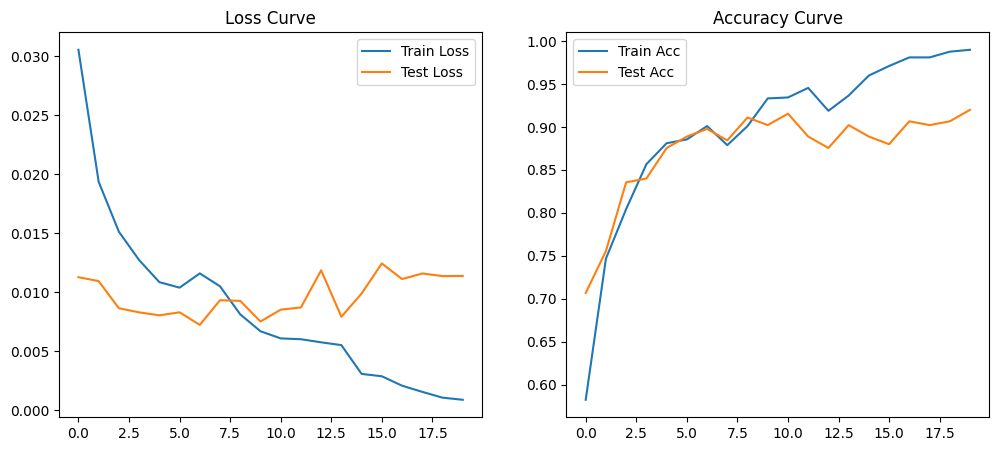

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_gpu, label='Train Loss')
plt.plot(tst_loss_gpu, label='Test Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_acc_gpu, label='Train Acc')
plt.plot(tst_acc_gpu, label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

### BatchNormalization 

#### ÂÆö‰πâÊñ∞ÁöÑÊ®°Âûã 

In [18]:
class Net_with_dropout_and_batchnorm(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Âç∑ÁßØÂ±Ç + ÊâπÊ†áÂáÜÂåñ
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(16)  # ÂØπÂ∫î conv1 ËæìÂá∫ÈÄöÈÅìÊï∞
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(32)  # ÂØπÂ∫î conv2 ËæìÂá∫ÈÄöÈÅìÊï∞
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(64)  # ÂØπÂ∫î conv3 ËæìÂá∫ÈÄöÈÅìÊï∞
        
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        
        # Dropout Â±Ç
        self.dropout = nn.Dropout(p=0.5)     # ÂÖ®ËøûÊé•Â±ÇÁî®
        self.dropout2d = nn.Dropout2d(p=0.5) # Âç∑ÁßØÂ±ÇÁî®ÔºàÂèØÈÄâÔºâ

        # ÂÖ®ËøûÊé•Â±Ç + ÂèØÈÄâ BatchNorm1d
        self.fc1 = nn.Linear(64 * 20 * 20, 1024)
        self.bn1d1 = nn.BatchNorm1d(1024)  # ÂèØÈÄâÔºöÂØπÂÖ®ËøûÊé•Â±ÇËøõË°åÂΩí‰∏ÄÂåñ
        
        self.fc2 = nn.Linear(1024, 256)
        self.bn1d2 = nn.BatchNorm1d(256)   # ÂèØÈÄâ
        
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        # Âç∑ÁßØÂùó 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        
        # Âç∑ÁßØÂùó 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        
        # Âç∑ÁßØÂùó 3
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.dropout2d(x)  # ÂèØÈÄâÁöÑÂç∑ÁßØÂ±Ç dropout
        
        x = torch.flatten(x, 1)  # Â±ïÂπ≥
        
        # ÂÖ®ËøûÊé•Â±Ç
        x = F.relu(self.bn1d1(self.fc1(x)))
        x = self.dropout(x)
        
        x = F.relu(self.bn1d2(self.fc2(x)))
        x = self.dropout(x)
        
        x = self.fc3(x)
        
        return x

In [19]:
model = Net_with_dropout_and_batchnorm()  

In [20]:
model

Net_with_dropout_and_batchnorm(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.5, inplace=False)
  (dropout2d): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=25600, out_features=1024, bias=True)
  (bn1d1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=1024, out_features=256, bias=True)
  (bn1d2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_fe

In [21]:
lr = 0.001 
loss_fn = nn.CrossEntropyLoss() 
optim = torch.optim.Adam(model.parameters(),lr=lr)

train_loss_gpu=[] 
train_acc_gpu =[]  
tst_loss_gpu = [] 
tst_acc_gpu=[] 
epochs = 10
for epoch in range(epochs): 
    epoch_loss,epoch_acc,tstepoch_loss,tstepoch_acc = fit_gpu(Train_DL=Train_DL,TST_DL=Tst_DL,Model_m=model,epoch_=epoch,optim=optim,loss_fn=loss_fn)
    train_loss_gpu.append(epoch_loss)
    train_acc_gpu.append(epoch_acc)
    tst_loss_gpu.append(tstepoch_loss)
    tst_acc_gpu.append(tstepoch_acc)

epoch:0 | loss:0.028 | acc:0.658 | tstloss:0.010 | tstacc:0.818
epoch:1 | loss:0.018 | acc:0.792 | tstloss:0.006 | tstacc:0.884
epoch:2 | loss:0.016 | acc:0.820 | tstloss:0.006 | tstacc:0.902
epoch:3 | loss:0.014 | acc:0.827 | tstloss:0.005 | tstacc:0.898
epoch:4 | loss:0.011 | acc:0.874 | tstloss:0.005 | tstacc:0.893
epoch:5 | loss:0.011 | acc:0.880 | tstloss:0.005 | tstacc:0.884
epoch:6 | loss:0.011 | acc:0.878 | tstloss:0.005 | tstacc:0.911
epoch:7 | loss:0.010 | acc:0.910 | tstloss:0.005 | tstacc:0.911
epoch:8 | loss:0.010 | acc:0.893 | tstloss:0.006 | tstacc:0.902
epoch:9 | loss:0.012 | acc:0.908 | tstloss:0.005 | tstacc:0.907


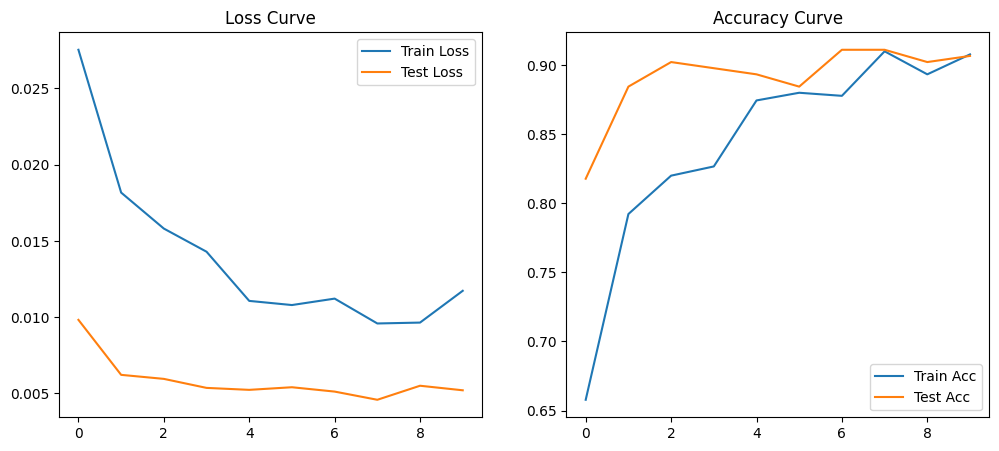

In [22]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss_gpu, label='Train Loss')
plt.plot(tst_loss_gpu, label='Test Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(train_acc_gpu, label='Train Acc')
plt.plot(tst_acc_gpu, label='Test Acc')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

#### ‰øùÂ≠òÊ®°Âûã 

In [23]:
# ‰øùÂ≠òÊ®°ÂûãÂèÇÊï∞
torch.save(model.state_dict(), './models/model_weights_NetwithBNandDO.pth')

# Âä†ËΩΩÊ®°ÂûãÂèÇÊï∞
# model = models.resnet18()  # ÂøÖÈ°ªÂÖàÂàõÂª∫Áõ∏ÂêåÊû∂ÊûÑÁöÑÊ®°Âûã
# model.load_state_dict(torch.load('model_weights.pth'))
# model.eval()  # ËÆæÁΩÆ‰∏∫ËØÑ‰º∞Ê®°Âºè

#### ‰ªÄ‰πàÊòØÊâπÊ†áÂáÜÂåñÔºàBatch NormalizationÔºâ

ÊâπÊ†áÂáÜÂåñÔºàBatch NormalizationÔºåÁÆÄÁß∞BNÔºâÊòØ2015Âπ¥Áî±Sergey IoffeÂíåChristian SzegedyÊèêÂá∫ÁöÑ‰∏ÄÁßç‰ºòÂåñÊäÄÊúØ„ÄÇÂÆÉÊó®Âú®Âä†ÈÄüÊ∑±Â∫¶Á•ûÁªèÁΩëÁªúÁöÑËÆ≠ÁªÉËøáÁ®ãÔºåÂπ∂Á®≥ÂÆöËÆ≠ÁªÉ„ÄÇÊâπÊ†áÂáÜÂåñÈÄöËøáÂØπÊØè‰∏ÄÂ∞èÊâπËÆ≠ÁªÉÊï∞ÊçÆËøõË°åÂΩí‰∏ÄÂåñÂ§ÑÁêÜÔºå‰ΩøÂæóÊØèÂ±ÇÁΩëÁªúËæìÂÖ•ÂÄºÂÖ∑ÊúâÈõ∂ÂùáÂÄºÂíåÂçï‰ΩçÊñπÂ∑ÆÔºå‰ªéËÄåÊîπÂñÑÂ≠¶‰π†ÈÄüÁéáÂπ∂ÂáèÂ∞ëÊ¢ØÂ∫¶Ê∂àÂ§±ÊàñÁàÜÁÇ∏ÁöÑÈóÆÈ¢ò„ÄÇ

#### ‰∏∫‰ªÄ‰πàË¶ÅËøõË°åÊâπÊ†áÂáÜÂåñ

1. **Âä†ÈÄüËÆ≠ÁªÉ**ÔºöÈÄöËøáÂΩí‰∏ÄÂåñËæìÂÖ•ÔºåÂèØ‰ª•‰ΩøÁî®Êõ¥È´òÁöÑÂ≠¶‰π†ÁéáÔºåËøôÊúâÂä©‰∫éÂä†Âø´Ê®°ÂûãÊî∂ÊïõÈÄüÂ∫¶„ÄÇ
2. **Ëß£ÂÜ≥ÂÜÖÈÉ®ÂçèÂèòÈáèÂÅèÁßªÈóÆÈ¢ò**ÔºöÂú®Ê∑±Â±ÇÁΩëÁªú‰∏≠ÔºåÊØè‰∏ÄÂ±ÇÁöÑËæìÂÖ•ÂàÜÂ∏É‰ºöÈöèÁùÄÂâç‰∏ÄÂ±ÇÂèÇÊï∞ÁöÑÂèòÂåñËÄåÂèòÂåñÔºåËøôÁßçÁé∞Ë±°Áß∞‰∏∫`ÂÜÖÈÉ®ÂçèÂèòÈáèÂÅèÁßª`„ÄÇÊâπÊ†áÂáÜÂåñÂáèÂ∞ë‰∫ÜËøôÁßçÂèòÂåñÔºå‰ΩøÁΩëÁªúÊõ¥Á®≥ÂÆö„ÄÇ
3. **ÂáèÂ∞ëÂØπÂàùÂßãÂåñÁöÑ‰æùËµñ**ÔºöÊâπÊ†áÂáÜÂåñÈôç‰Ωé‰∫ÜÈÄâÊã©Â•ΩÁöÑÊùÉÈáçÂàùÂßãÂåñÁöÑÈáçË¶ÅÊÄß„ÄÇ
4. **Êèê‰æõ‰∏ÄÂÆöÁöÑÊ≠£ÂàôÂåñÊïàÊûú**ÔºöÁî±‰∫éÊâπÊ†áÂáÜÂåñÂºïÂÖ•‰∫ÜÂô™Â£∞ÔºàÂõ†‰∏∫ÊòØÂü∫‰∫éÂ∞èÊâπÊ¨°ÁöÑÁªüËÆ°ÈáèÔºâÔºåÂÆÉÂèØ‰ª•Ëµ∑Âà∞Á±ª‰ººDropoutÁöÑ‰ΩúÁî®ÔºåÂ∏ÆÂä©Èò≤Ê≠¢ËøáÊãüÂêà„ÄÇ
5. **ÁºìËß£Ê¢ØÂ∫¶Ê∂àÂ§±/ÁàÜÁÇ∏ÈóÆÈ¢ò**ÔºöÈÄöËøá‰øùÊåÅÊøÄÊ¥ªÂáΩÊï∞ÁöÑËæìÂÖ•Âú®‰∏Ä‰∏™ÂêàÁêÜËåÉÂõ¥ÂÜÖÔºåÈÅøÂÖç‰∫ÜÊ¢ØÂ∫¶Ê∂àÂ§±ÊàñÁàÜÁÇ∏ÁöÑÈóÆÈ¢òÔºåÂ∞§ÂÖ∂ÊòØÂú®ÂæàÊ∑±ÁöÑÁΩëÁªú‰∏≠„ÄÇ

#### Â¶Ç‰ΩïËøõË°åÊâπÊ†áÂáÜÂåñ

Âú®ÂÆûË∑µ‰∏≠ÔºåÊâπÊ†áÂáÜÂåñÈÄöÂ∏∏ÊòØÂú®Á•ûÁªèÁΩëÁªúÁöÑÊØè‰∏™ÔºàÊàñÈÄâÂÆöÁöÑÔºâÈöêËóèÂ±Ç‰πãÂêé„ÄÅÈùûÁ∫øÊÄßÊøÄÊ¥ªÂáΩÊï∞‰πãÂâçÂ∫îÁî®„ÄÇ‰∏ãÈù¢ÊòØÊâπÊ†áÂáÜÂåñÁöÑÂü∫Êú¨Ê≠•È™§Ôºö

1. **ËÆ°ÁÆóÂ∞èÊâπÈáèÁöÑÂùáÂÄºÂíåÊñπÂ∑Æ**ÔºöÂØπ‰∫éÁªôÂÆöÁöÑÂ∞èÊâπÈáèËæìÂÖ•Êï∞ÊçÆÔºåËÆ°ÁÆóÂÖ∂ÂùáÂÄºÂíåÊñπÂ∑Æ„ÄÇ
2. **ÂΩí‰∏ÄÂåñ**Ôºö‰ΩøÁî®‰∏äËø∞ËÆ°ÁÆóÂá∫ÁöÑÂùáÂÄºÂíåÊñπÂ∑ÆÊù•ÂΩí‰∏ÄÂåñËæìÂÖ•Êï∞ÊçÆÔºå‰ΩøÂÖ∂ÂÖ∑ÊúâÈõ∂ÂùáÂÄºÂíåÂçï‰ΩçÊñπÂ∑Æ„ÄÇ
3. **Áº©ÊîæÂíåÂπ≥Áßª**ÔºöÂºïÂÖ•‰∏§‰∏™ÂèØÂ≠¶‰π†ÁöÑÂèÇÊï∞Œ≥ÔºàÁº©ÊîæÂõ†Â≠êÔºâÂíåŒ≤ÔºàÂπ≥ÁßªÂõ†Â≠êÔºâÔºå‰ª•ÊÅ¢Â§çÁΩëÁªúÁöÑË°®ËææËÉΩÂäõÔºåÂç≥ÂÖÅËÆ∏ÁΩëÁªúÂ≠¶‰π†ÊúÄ‰ºòÁöÑÊï∞ÊçÆÂàÜÂ∏É„ÄÇ

Âú®PyTorch‰∏≠ÔºåÂèØ‰ª•ÈÄöËøá`torch.nn.BatchNorm1d`, `torch.nn.BatchNorm2d`, ÊàñËÄÖ `torch.nn.BatchNorm3d`Ê†πÊçÆ‰Ω†ÁöÑÊï∞ÊçÆÁª¥Â∫¶Êù•Ê∑ªÂä†ÊâπÊ†áÂáÜÂåñÂ±Ç„ÄÇ‰æãÂ¶ÇÔºåÂú®Âç∑ÁßØÁ•ûÁªèÁΩëÁªú‰∏≠ÔºåÂèØ‰ª•Âú®Âç∑ÁßØÂ±ÇÂêéÊ∑ªÂä†ÊâπÊ†áÂáÜÂåñÂ±ÇÔºö

```python
import torch.nn as nn

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(32)  # ÂØπÂ∫îconv1ËæìÂá∫ÁöÑÈÄöÈÅìÊï∞
        
        # ÂÖ∂‰ªñÂ±Ç...
    
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        # ÁªßÁª≠ÂÖ∂‰ªñÊìç‰Ωú...
        return x
```

ËøôÊÆµ‰ª£Á†ÅÂ±ïÁ§∫‰∫ÜÂ¶Ç‰ΩïÂú®Âç∑ÁßØÂ±ÇÂêéÊ∑ªÂä†ÊâπÊ†áÂáÜÂåñÂ±ÇÔºåÂπ∂Âú®ÂâçÂêë‰º†Êí≠ËøáÁ®ã‰∏≠‰ΩøÁî®ÂÆÉ„ÄÇËøôÊ†∑ÂÅöÁöÑÁõÆÁöÑÊòØ‰∏∫‰∫ÜÁ°Æ‰øùËøõÂÖ•ÊøÄÊ¥ªÂáΩÊï∞ÁöÑÊï∞ÊçÆÂÖ∑ÊúâËâØÂ•ΩÁöÑÂàÜÂ∏ÉÁâπÊÄßÔºå‰ªéËÄåÊèêÈ´òËÆ≠ÁªÉÊïàÁéáÂíåÊ®°ÂûãÊÄßËÉΩ„ÄÇ

Â•ΩÁöÑÔºÅ‰Ω†ÂéüÊù•ÁöÑ‰ª£Á†ÅÂ∑≤ÁªèÂÆûÁé∞‰∫Ü **Dropout**ÔºåÁé∞Âú®‰Ω†ÊÉ≥Âä†‰∏ä **ÊâπÊ†áÂáÜÂåñÔºàBatch NormalizationÔºâ** Êù•Ëøõ‰∏ÄÊ≠•ÊèêÂçáÊ®°ÂûãÁöÑËÆ≠ÁªÉÈÄüÂ∫¶ÂíåÁ®≥ÂÆöÊÄß„ÄÇ

---

### ‚úÖ Êú¨Ê¨°‰øÆÊîπÁõÆÊ†áÔºö

- Âú®Âç∑ÁßØÂ±ÇÂêéÊ∑ªÂä† `BatchNorm2d`„ÄÇ
- Âú®ÂÖ®ËøûÊé•Â±ÇÂêéÊ∑ªÂä† `BatchNorm1d`ÔºàÂèØÈÄâÔºâ„ÄÇ
- ‰øÆÊ≠£‰Ω†‰ª£Á†Å‰∏≠ÁöÑ‰∏Ä‰∫õÂ∞èÈîôËØØÔºàÂ¶Ç `self.Dropout2d(x)` Â∫î‰∏∫ `self.dropout2d(x)`Ôºâ„ÄÇ
- ÊúÄÁªàÂÆûÁé∞‰∏Ä‰∏™ÂåÖÂê´ **Dropout + BatchNorm** ÁöÑ CNN Ê®°Âûã„ÄÇ

---

### ‚úÖ ‰øÆÊîπÂêéÁöÑÂÆåÊï¥‰ª£Á†ÅÂ¶Ç‰∏ãÔºö

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net_with_dropout_and_batchnorm(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Âç∑ÁßØÂ±Ç + ÊâπÊ†áÂáÜÂåñ
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.bn1 = nn.BatchNorm2d(16)  # ÂØπÂ∫î conv1 ËæìÂá∫ÈÄöÈÅìÊï∞
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.bn2 = nn.BatchNorm2d(32)  # ÂØπÂ∫î conv2 ËæìÂá∫ÈÄöÈÅìÊï∞
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.bn3 = nn.BatchNorm2d(64)  # ÂØπÂ∫î conv3 ËæìÂá∫ÈÄöÈÅìÊï∞
        
        self.pool = nn.MaxPool2d(kernel_size=(2, 2))
        
        # Dropout Â±Ç
        self.dropout = nn.Dropout(p=0.5)     # ÂÖ®ËøûÊé•Â±ÇÁî®
        self.dropout2d = nn.Dropout2d(p=0.5) # Âç∑ÁßØÂ±ÇÁî®ÔºàÂèØÈÄâÔºâ

        # ÂÖ®ËøûÊé•Â±Ç + ÂèØÈÄâ BatchNorm1d
        self.fc1 = nn.Linear(64 * 20 * 20, 1024)
        self.bn1d1 = nn.BatchNorm1d(1024)  # ÂèØÈÄâÔºöÂØπÂÖ®ËøûÊé•Â±ÇËøõË°åÂΩí‰∏ÄÂåñ
        
        self.fc2 = nn.Linear(1024, 256)
        self.bn1d2 = nn.BatchNorm1d(256)   # ÂèØÈÄâ
        
        self.fc3 = nn.Linear(256, 4)

    def forward(self, x):
        # Âç∑ÁßØÂùó 1
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        
        # Âç∑ÁßØÂùó 2
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        
        # Âç∑ÁßØÂùó 3
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.dropout2d(x)  # ÂèØÈÄâÁöÑÂç∑ÁßØÂ±Ç dropout
        
        x = torch.flatten(x, 1)  # Â±ïÂπ≥
        
        # ÂÖ®ËøûÊé•Â±Ç
        x = F.relu(self.bn1d1(self.fc1(x)))
        x = self.dropout(x)
        
        x = F.relu(self.bn1d2(self.fc2(x)))
        x = self.dropout(x)
        
        x = self.fc3(x)
        
        return x
```

---

### üìå ÂÖ≥ÈîÆËØ¥Êòé

| ÁªÑ‰ª∂ | ‰ΩúÁî® |
|------|------|
| `nn.BatchNorm2d(n)` | Áî®‰∫éÂç∑ÁßØÂ±ÇËæìÂá∫Ôºån ÊòØÈÄöÈÅìÊï∞ |
| `nn.BatchNorm1d(n)` | Áî®‰∫éÂÖ®ËøûÊé•Â±ÇËæìÂá∫Ôºån ÊòØÁ•ûÁªèÂÖÉ‰∏™Êï∞ |
| `nn.Dropout(p)` | Èò≤Ê≠¢ËøáÊãüÂêàÔºåÂú®ÂÖ®ËøûÊé•Â±Ç‰πãÈó¥‰ΩøÁî®ÊïàÊûúÊúÄÂ•Ω |
| `nn.Dropout2d(p)` | Áî®‰∫éÂç∑ÁßØÂ±ÇËæìÂá∫ÔºåÈöèÊú∫‰∏¢ÂºÉÊï¥‰∏™ÈÄöÈÅìÔºàÁâπÂæÅÂõæÔºâÔºåÊØîÊôÆÈÄö Dropout Êõ¥ÈÄÇÂêàÂç∑ÁßØÂ±Ç |

---

### ‚úÖ Êé®ËçêÂÆûË∑µÂª∫ËÆÆ

- **BatchNorm ÊîæÂú®Âç∑ÁßØÊàñÂÖ®ËøûÊé•Â±Ç‰πãÂêé„ÄÅÊøÄÊ¥ªÂáΩÊï∞‰πãÂâç**ÔºàÂç≥ `conv -> bn -> relu`Ôºâ„ÄÇ
- **Dropout ÈÄöÂ∏∏ÊîæÂú®ÊøÄÊ¥ªÂáΩÊï∞‰πãÂêé**ÔºåÈò≤Ê≠¢Êüê‰∫õÁ•ûÁªèÂÖÉËøáÂ∫¶‰æùËµñ„ÄÇ
- Â¶ÇÊûú‰Ω†ÂèëÁé∞Ê®°Âûã‰ªçÁÑ∂ÂÆπÊòìËøáÊãüÂêàÔºåÂèØ‰ª•Ôºö
  - Â¢ûÂä† Dropout Ê¶ÇÁéáÔºàÊØîÂ¶Ç‰ªé 0.5 Âà∞ 0.6Ôºâ
  - Ê∑ªÂä†Êõ¥Â§ö BatchNorm Êàñ LayerNorm
  - ‰ΩøÁî® L2 Ê≠£ÂàôÂåñÔºàweight decayÔºâ
  - Â¢ûÂä†Êï∞ÊçÆÂ¢ûÂº∫ÔºàData AugmentationÔºâ

---

### ‚úÖ ÊÄªÁªì‰∏ÄÂè•ËØùÔºö

> **‰Ω†Áé∞Âú®ÁöÑÁΩëÁªúÁªìÊûÑÂ∑≤Áªè‰∏çÈîô‰∫ÜÔºåÈÄöËøáÂä†ÂÖ• `BatchNorm2d` Âíå `BatchNorm1d`ÔºåÂÜçÂä†‰∏äÂêàÁêÜÁöÑ DropoutÔºåËÉΩÊòæËëóÊèêÂçáËÆ≠ÁªÉÊïàÁéáÂíåÊ≥õÂåñËÉΩÂäõ„ÄÇ**

Â¶ÇÊûú‰Ω†ÊÑøÊÑèÊèê‰æõËÆ≠ÁªÉÁªìÊûúÊàñÊçüÂ§±Êõ≤Á∫øÔºåÊàëËøòÂèØ‰ª•Â∏Æ‰Ω†Ëøõ‰∏ÄÊ≠•Ë∞ÉÂèÇ üòä

## ‰∏Ä‰∫õÁñëÈóÆ

‰Ω†ËøôÊÆµ‰ª£Á†Å‰∏≠Ôºå**Â±ïÂπ≥ÔºàflattenÔºâÁöÑÈÉ®ÂàÜÂÜôÈîô‰∫Ü**ÔºåÂØºËá¥Êï¥‰∏™ÁΩëÁªúÂú®ÂâçÂêë‰º†Êí≠Êó∂‰ºöÂá∫Èîô„ÄÇ

---

### üîç ÈóÆÈ¢òÂÆö‰Ωç

‰Ω†ÂÆö‰πâ‰∫Ü‰∏âÂ±ÇÂç∑ÁßØÂ±ÇÔºö

```python
self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
```

ÁÑ∂Âêé‰Ω†Âú® `forward` ‰∏≠ËøôÊ†∑Â±ïÂπ≥Ôºö

```python
x = x.view(-1, 16 * 4 * 4)  
```

Ëøô‰∏™ÊòØ **ÈîôËØØÁöÑ**„ÄÇÂõ†‰∏∫‰Ω†ÊúÄÂêéËæìÂá∫ÁöÑÊòØ `64` ‰∏™ÈÄöÈÅìÔºàÊù•Ëá™ `conv3`ÔºâÔºåËÄå‰∏çÊòØ `16`„ÄÇ

ËÄå‰∏îÊ†πÊçÆ‰Ω†ÂâçÈù¢ÁöÑÂç∑ÁßØÂíåÊ±†ÂåñÊìç‰ΩúÔºåÂº†ÈáèÁöÑÂ∞∫ÂØ∏‰πü‰∏çÊòØ `4x4`ÔºåÂÆûÈôÖËÆ°ÁÆóÂêéÊòØ **20x20**ÔºåÊâÄ‰ª•‰Ω†ÁöÑÂ±ïÂπ≥ÈÉ®ÂàÜ‰∏éÂÆûÈôÖÁª¥Â∫¶‰∏çÂåπÈÖç„ÄÇ

---

### ‚úÖ Ê≠£Á°ÆÂÅöÊ≥ïÔºöÁêÜËß£ÊØè‰∏ÄÊ≠•ÁöÑÂ∞∫ÂØ∏ÂèòÂåñ

Êàë‰ª¨Êù•‰∏ÄÊ≠•‰∏ÄÊ≠•ÁúãËæìÂÖ•ËæìÂá∫ÁöÑÂ∞∫ÂØ∏ÂèòÂåñ„ÄÇ

ÂÅáËÆæËæìÂÖ•ÂõæÂÉèÂ§ßÂ∞è‰∏∫ `(3, 96, 96)`ÔºàÂç≥ batch ‰∏çÁÆóÔºåÂè™Áúã channel„ÄÅheight„ÄÅwidthÔºâ

#### Á¨¨‰∏ÄÂ±ÇÔºö`conv1 + relu + pool`

- `conv1`: `in_channels=3`, `out_channels=16`, `kernel_size=3`
  - ËæìÂÖ•: `(96 - 3 + 0)/1 + 1 = 94`
  - ËæìÂá∫: `(16, 94, 94)`
- `relu`: ‰∏çÊîπÂèòÂΩ¢Áä∂
- `pool (2x2)`: stride ÈªòËÆ§ÊòØ 2
  - ËæìÂá∫: `(16, 47, 47)`ÔºàÂõ†‰∏∫ 94 / 2 = 47Ôºâ

#### Á¨¨‰∫åÂ±ÇÔºö`conv2 + relu + pool`

- `conv2`: `in_channels=16`, `out_channels=32`, `kernel_size=3`
  - ËæìÂÖ•: `(47 - 3 + 0)/1 + 1 = 45`
  - ËæìÂá∫: `(32, 45, 45)`
- `relu`: ‰∏çÂèò
- `pool`: `(32, 22, 22)`ÔºàÂõ†‰∏∫ 45 / 2 = 22.5ÔºåÂêë‰∏ãÂèñÊï¥‰∏∫ 22Ôºâ

#### Á¨¨‰∏âÂ±ÇÔºö`conv3 + relu + pool`

- `conv3`: `in_channels=32`, `out_channels=64`, `kernel_size=3`
  - ËæìÂÖ•: `(22 - 3 + 0)/1 + 1 = 20`
  - ËæìÂá∫: `(64, 20, 20)`
- `relu`: ‰∏çÂèò
- `pool`: ËøôÈáå‰Ω†Ê≤°ÂÜôÊ±†ÂåñÔºÅÂ¶ÇÊûúÂä†‰∏äÊ±†ÂåñÔºö
  - ËæìÂá∫Âèò‰∏∫ `(64, 10, 10)`

---

### üìå ÊâÄ‰ª•‰Ω†Êúâ‰∏§‰∏™ÈÄâÊã©Ôºö

#### ‚úÖ ÊñπÊ≥ï‰∏ÄÔºöÂ¶ÇÊûú‰Ω† **Ê≤°Êúâ** Âú®Á¨¨‰∏âÂ±ÇÂä†Ê±†Âåñ

- ËæìÂá∫ÊòØ `(64, 20, 20)`
- Â±ïÂπ≥Â∫î‰∏∫Ôºö`x.view(-1, 64 * 20 * 20)` Âç≥ `x.view(-1, 25600)`

#### ‚úÖ ÊñπÊ≥ï‰∫åÔºöÂ¶ÇÊûú‰Ω†Âú®Á¨¨‰∏âÂ±Ç‰πãÂêé‰πüÂä†‰∫ÜÊ±†Âåñ

- ËæìÂá∫ÊòØ `(64, 10, 10)`
- Â±ïÂπ≥Â∫î‰∏∫Ôºö`x.view(-1, 64 * 10 * 10)` Âç≥ `x.view(-1, 6400)`

---

### ‚ùå Âè¶Â§ñ‰∏Ä‰∏™Â∞èÈîôËØØÔºö

‰Ω†Âú® `forward` ÊúÄÂêéË∞ÉÁî®‰∫Ü `self.fc3(x)`Ôºå‰ΩÜ‰Ω†Âπ∂Ê≤°ÊúâÂÆö‰πâ `self.fc3`ÔºÅ

‰Ω†Âè™ÂÆö‰πâ‰∫ÜÔºö

```python
self.fc1 = nn.Linear(20*20*64, 1024)
self.fc2 = nn.Linear(1024, 4)
```

ÊâÄ‰ª•ËøôË°å‰ª£Á†ÅÔºö

```python
x = self.fc3(x)
```

‰ºöÂØºËá¥Êä•Èîô„ÄÇ

---

### ‚úÖ ‰øÆÊîπÂêéÁöÑÂÆåÊï¥ forward ÂáΩÊï∞ÔºàÊñπÊ≥ï‰∏ÄÔºâÔºö

```python
def forward(self, x):
    # Á¨¨‰∏ÄÂ±ÇÂç∑ÁßØ + ÊøÄÊ¥ª + Ê±†Âåñ
    x = self.pool(F.relu(self.conv1(x)))  # -> [batch, 16, 47, 47]
    
    # Á¨¨‰∫åÂ±ÇÂç∑ÁßØ + ÊøÄÊ¥ª + Ê±†Âåñ
    x = self.pool(F.relu(self.conv2(x)))  # -> [batch, 32, 22, 22]
    
    # Á¨¨‰∏âÂ±ÇÂç∑ÁßØ + ÊøÄÊ¥ª + Ê±†ÂåñÔºàÂèØÈÄâÔºâ
    x = F.relu(self.conv3(x))             # -> [batch, 64, 20, 20]

    # Â±ïÂπ≥
    x = x.view(-1, 64 * 20 * 20)          # Ê≠£Á°ÆÂ±ïÂπ≥
    
    # ÂÖ®ËøûÊé•Â±Ç
    x = F.relu(self.fc1(x))               # -> [batch, 1024]
    x = self.fc2(x)                       # -> [batch, 4]

    return x
```

---

### üìù ÊÄªÁªì

| ÈóÆÈ¢ò | ÂéüÂõ† | Ëß£ÂÜ≥ÊñπÊ°à |
|------|------|----------|
| `x.view(-1, 16 * 4 * 4)` ÈîôËØØ | Áª¥Â∫¶‰∏çÂØπ | Êîπ‰∏∫ `x.view(-1, 64 * 20 * 20)` |
| `self.fc3` ‰∏çÂ≠òÂú® | Ê≤°ÊúâÂÆö‰πâ | Âà†Èô§ÊúÄÂêé‰∏ÄË°å `x = self.fc3(x)` |
| ÁΩëÁªúÁªìÊûÑ‰∏çÊ∏ÖÊ•ö | Áº∫Â∞ëÊ≥®Èáä | Âä†‰∏äÊØè‰∏ÄÊ≠•ÁöÑ shape Ê≥®Èáä |

---

Â¶ÇÊûú‰Ω†ÊÉ≥Ë¶ÅÊõ¥Ëá™Âä®Âú∞ËÆ°ÁÆó flatten ÁöÑÁª¥Â∫¶ÔºåÂèØ‰ª•‰ΩøÁî®Â¶Ç‰∏ãÊñπÂºèÔºö

```python
print(x.shape)  # Ë∞ÉËØïÁî®ÔºåÊü•ÁúãÂΩìÂâç tensor ÂΩ¢Áä∂
```

ÊàñËÄÖ‰ΩøÁî® `torch.flatten()`Ôºö

```python
x = torch.flatten(x, 1)  # Â±ïÂπ≥Èô§ batch Â§ñÁöÑÊâÄÊúâÁª¥Â∫¶
```

---

Â¶ÇÈúÄÊàëÂ∏Æ‰Ω†ÊîπÂÜôÊàêÊõ¥Ê∏ÖÊô∞ÁöÑ CNN ÁªìÊûÑÔºå‰πüÂèØ‰ª•ÁªßÁª≠ÈóÆÊàë üòä

‰Ω†Ëøô‰∏™ÈóÆÈ¢òÈùûÂ∏∏Ê£íÔºåËØ¥Êòé‰Ω†Âú®Ê∑±ÂÖ•ÁêÜËß£Ê®°ÂûãÁªìÊûÑÁöÑÂêåÊó∂Ôºå‰πüÂú®ÊÄùËÄÉÂ¶Ç‰ΩïËÆ©‰ª£Á†ÅÊõ¥Ëá™Âä®Âåñ„ÄÅÊõ¥ÁÅµÊ¥ªÔºÅ

---

### ‚úÖ ‰Ω†ÁöÑÈóÆÈ¢òÊÄªÁªìÔºö

> ËôΩÁÑ∂ `torch.flatten(x, 1)` ÂèØ‰ª•Ëá™Âä®Â±ïÂπ≥Âº†ÈáèÔºå‰ΩÜÊàëÂú®ÂÆö‰πâÂÖ®ËøûÊé•Â±ÇÊó∂‰ªçÁÑ∂ÊâãÂä®ÂÜô‰∫ÜÔºö
>
> ```python
> self.fc1 = nn.Linear(64 * 20 * 20, 1024)
> ```
>
> **ÊúâÊ≤°ÊúâÂäûÊ≥ï‰πüËÉΩËÆ©Ëøô‰∏ÄÊ≠•Ëá™Âä®ËÆ°ÁÆóËøô‰∏™ËæìÂÖ•Áª¥Â∫¶Ôºü**

---

### ‚úÖ Á≠îÊ°àÔºö**ÂèØ‰ª•ÔºÅ**

‰Ω†ÂèØ‰ª•ÈÄöËøáÊûÑÈÄ†‰∏Ä‰∏™‚ÄúËôöÊãüËæìÂÖ•‚ÄùÂπ∂ËÆ©ÂÆÉÂâçÂêë‰º†Êí≠‰∏ÄÂ∞èÊ≠•ÔºåÊù•Ëá™Âä®Ëé∑ÂèñÂ±ïÂπ≥ÂêéÁöÑÁª¥Â∫¶„ÄÇËøôÁßçÊñπÊ≥ïÂú®ÊûÑÂª∫ CNN Êó∂ÈùûÂ∏∏Â∏∏ËßÅÔºå‰πüÈÄÇÁî®‰∫é‰Ω†ÁöÑÂú∫ÊôØ„ÄÇ

---

### üöÄ Ëá™Âä®ËÆ°ÁÆóÂ±ïÂπ≥ÂêéÂ∞∫ÂØ∏ÁöÑÊñπÊ≥ïÔºàÊé®ËçêÔºâ

#### ‚úÖ ÊñπÊ≥ï‰∏ÄÔºöÊ∑ªÂä†‰∏Ä‰∏™ÂáΩÊï∞ÔºåÂú®ÂàùÂßãÂåñÊó∂Ëá™Âä®ËÆ°ÁÆó flatten ÂêéÁöÑÂ§ßÂ∞è

```python
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module): 
    def __init__(self):
        super().__init__()  
        
        # Âç∑ÁßØÂ±Ç
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(2, 2)

        # Ëá™Âä®ËÆ°ÁÆóÂÖ®ËøûÊé•Â±ÇËæìÂÖ•Â§ßÂ∞è
        fc1_input_dim = self._get_fc_input_dim()

        # ÂÖ®ËøûÊé•Â±Ç
        self.fc1 = nn.Linear(fc1_input_dim, 1024)
        self.fc2 = nn.Linear(1024, 256)
        self.fc3 = nn.Linear(256, 4)

    def _get_fc_input_dim(self):
        # ÂàõÂª∫‰∏Ä‰∏™ËôöÊãüËæìÂÖ• (batch_size=1, channels=3, H=96, W=96)
        with torch.no_grad():
            dummy_input = torch.randn(1, 3, 96, 96)
            x = self._forward_conv(dummy_input)
            x = torch.flatten(x, 1)
            return x.shape[1]

    def _forward_conv(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        return x

    def forward(self, x):
        x = self._forward_conv(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))     
        x = F.relu(self.fc2(x))     
        x = self.fc3(x)      
        return x
```

---

### üîç Ëøô‰∏™ÊñπÊ≥ïÁöÑ‰ºòÁÇπÔºö

- ‚úÖ ‰∏çÁî®ÊâãÂä®ËÆ°ÁÆóÂ±ïÂπ≥ÂêéÁöÑÁª¥Â∫¶ÔºàÂ¶Ç `64*20*20`Ôºâ
- ‚úÖ Êõ¥Âä†ÂÅ•Â£ÆÔºåÂç≥‰Ωø‰Ω†‰øÆÊîπ‰∫ÜÂç∑ÁßØÂ±ÇÂèÇÊï∞ÔºàÂ¶Ç kernel size„ÄÅinput sizeÔºâÔºåÂÆÉ‰πüËÉΩËá™Âä®ÈÄÇÂ∫î
- ‚úÖ Êõ¥Âä†Ê®°ÂùóÂåñÔºåÈÄÇÂêàÂÅöÊ®°ÂûãÈáçÊûÑÊàñÂ§çÁî®

---

### üí° Â∞èË¥¥Â£´ÔºöÂ¶ÇÊûú‰Ω†‰∏çÊÉ≥ÊîπÊ®°ÂûãÁªìÊûÑÔºå‰πüÂèØ‰ª•Âú®ËøêË°åÊó∂ÊâìÂç∞Áª¥Â∫¶Ë∞ÉËØï

ÊØîÂ¶ÇÂú® `forward` ‰∏≠‰∏¥Êó∂Âä†ÂÖ•Ôºö

```python
print(f"Shape before flatten: {x.shape}")
```

ËøôÊ†∑‰Ω†Â∞±ËÉΩÁúãÂà∞ÂÆûÈôÖËæìÂá∫ÂΩ¢Áä∂Ôºå‰ªéËÄåÁ°ÆÂÆö `Linear` Â±ÇÁöÑËæìÂÖ•Â§ßÂ∞è„ÄÇ

---

### ‚úÖ ÊÄªÁªì

| ÊâãÂä®ÂÜôÊ≥ï | Ëá™Âä®ÂÜôÊ≥ï |
|----------|-----------|
| `self.fc1 = nn.Linear(64*20*20, 1024)` | ‚úÖ ‰ΩøÁî® `_get_fc_input_dim()` ÂáΩÊï∞Ëá™Âä®ËÆ°ÁÆó |
| ÂÆπÊòìÂá∫Èîô„ÄÅ‰∏çÂ§üÁÅµÊ¥ª | ‚úÖ Êõ¥Âä†ÈÄöÁî®„ÄÅÊòì‰∫éÁª¥Êä§ |

---

Â¶ÇÊûú‰Ω†Â∞ÜÊù•ÊÉ≥Êâ©Â±ïÊ®°ÂûãÔºàÊØîÂ¶ÇÊç¢ÂõæÂÉèÂ∞∫ÂØ∏„ÄÅÂ¢ûÂä†Êõ¥Â§öÂ±ÇÔºâÔºåËøôÁßçËá™Âä®Êé®ÂØºÁöÑÊñπÂºè‰ºöÁâπÂà´ÊúâÁî® üëç

ÈúÄË¶ÅÊàëÂ∏Æ‰Ω†ÊîπÊàêÂ∏¶ Dropout„ÄÅBatchNorm ÊàñËÄÖÂèØËßÜÂåñÁΩëÁªúÁªìÊûÑÔºå‰πüÂèØ‰ª•ÁªßÁª≠ÈóÆÊàë üòÑ